## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão. Para tanto, use o StandardScaler e inicialize-o com os dados do conjunto de treino (fit), ajudando-os em seguida (transform). Depois, ajuste os dados do conjunto de testes.

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 10 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 10 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [30]:
# ==============================================================
# Libraries Import
# ==============================================================

import os
import kagglehub
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# ==============================================================
# Opening the Forest Cover Type dataset
# ==============================================================

"""
Answer to Question 1:
This cell loads the 'Forest Cover Type' dataset using pandas.
If the kagglehub package is available, it downloads the dataset directly.
Otherwise, it loads a local copy.
"""

try:
    path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
    csv_path = os.path.join(path, "covtype.csv")
    df = pd.read_csv(csv_path)
    print("Dataset successfully loaded from Kaggle.")
except Exception as e:
    print("Error using kagglehub:", e)
    df = pd.read_csv("covtype.csv")
    print("Dataset loaded from local file.")

print("Shape of the dataset:", df.shape)
df.head()


Dataset successfully loaded from Kaggle.
Shape of the dataset: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
# ==============================================================
# Removing categorical attributes
# ==============================================================

"""
Answer to Question 2:
This cell removes all categorical (binary dummy) columns from the dataset,
keeping only continuous (numerical) predictor attributes.
"""

# Identify categorical columns (Wilderness_Area and Soil_Type)
categorical_columns = [col for col in df.columns if "Wilderness_Area" in col or "Soil_Type" in col]

# Remove them from the dataframe
df_numerical = df.drop(columns=categorical_columns)

print("Removed categorical columns:", len(categorical_columns))
print("Remaining columns:", df_numerical.shape[1])
df_numerical.head()


Removed categorical columns: 44
Remaining columns: 11


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [13]:
# ==============================================================
# Separating predictors (X) and target (y)
# ==============================================================

"""
Answer to Question 3:
This cell separates the target attribute (Cover_Type) into 'y'
and the remaining predictor attributes into 'X'.
"""

# Separate target and predictors
X = df_numerical.drop(columns=["Cover_Type"])
y = df_numerical["Cover_Type"]

print("Predictor matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Predictor matrix X shape: (581012, 10)
Target vector y shape: (581012,)


In [14]:
# ==============================================================
# Performing a holdout 70/30 partition
# ==============================================================

"""
Answer to Question 4:
This cell splits the dataset into training and testing subsets
using the holdout method with a 70/30 ratio.
"""


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (406708, 10)
Test set shape: (174304, 10)


In [15]:
# ==============================================================
# Scaling the attributes (Standardization)
# ==============================================================

"""
Answer to Question 5:
This cell performs standardization using sklearn's StandardScaler.
The scaler is fit only on the training set and then applied to both sets,
ensuring no data leakage from the test set.
"""

# Initialize and fit the scaler using training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply transformation to the test data
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully.")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)


Feature scaling completed successfully.
Scaled training data shape: (406708, 10)
Scaled test data shape: (174304, 10)


In [9]:
# ==============================================================
# Training a MLP
# ==============================================================

"""
Answer to Question 5 (part 2 - MLP initial proposition):
This cell proposes a MLP model with the following parameters
 - Layers: input layer, 1 hidden layer, output layer
 - Hidden layer size: 10 neurons
And the following Hyperparameters:
 - Activation function: Relu
 - Solver: Adam
 - Max epochs: 300
"""

mlp = MLPClassifier(
    hidden_layer_sizes=(10,), 
    activation='relu', 
    solver='adam', 
    max_iter=300, 
    verbose=True
)

mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 0.94620355
Iteration 2, loss = 0.72328381
Iteration 3, loss = 0.69742086
Iteration 4, loss = 0.68082748
Iteration 5, loss = 0.67339303
Iteration 6, loss = 0.66898877
Iteration 7, loss = 0.66590167
Iteration 8, loss = 0.66403705
Iteration 9, loss = 0.66269371
Iteration 10, loss = 0.66169190
Iteration 11, loss = 0.66095553
Iteration 12, loss = 0.66040582
Iteration 13, loss = 0.65999416
Iteration 14, loss = 0.65961422
Iteration 15, loss = 0.65921296
Iteration 16, loss = 0.65877916
Iteration 17, loss = 0.65825723
Iteration 18, loss = 0.65756930
Iteration 19, loss = 0.65695612
Iteration 20, loss = 0.65654537
Iteration 21, loss = 0.65626212
Iteration 22, loss = 0.65601061
Iteration 23, loss = 0.65573833
Iteration 24, loss = 0.65557801
Iteration 25, loss = 0.65548005
Iteration 26, loss = 0.65524066
Iteration 27, loss = 0.65506296
Iteration 28, loss = 0.65508541
Iteration 29, loss = 0.65497103
Iteration 30, loss = 0.65474010
Iteration 31, loss = 0.65475949
Iteration 32, los

,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


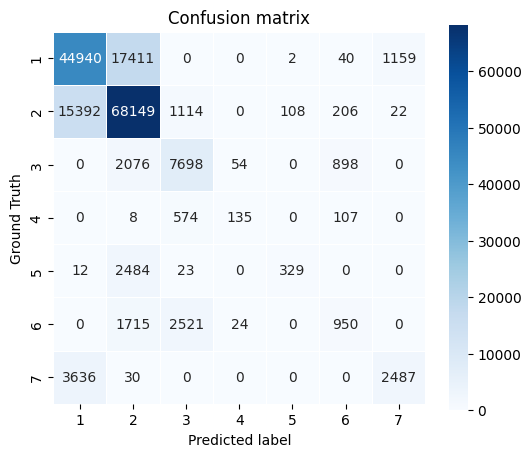


Métricas obtidas
 - Acurácia: 0.72
 - F1 Score: 0.70
 - Precisão: 0.71
 - Revocação: 0.72



In [27]:
# ==============================================================
# Evaluating the proposed model
# ==============================================================

"""
Answer to Question 6:
This cell will present the metrics obtained from the MLP proposed above.
Metrics used:
 - Accuracy
 - Precision
 - Recall
 - F1
 - Confusion matrix
"""

sorted_labels = np.sort(y.unique())

y_predict = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_predict, labels=sorted_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidth=.5, square=True,
           xticklabels=sorted_labels,
           yticklabels=sorted_labels
)

plt.xlabel("Predicted label")
plt.ylabel("Ground Truth")
plt.title("Confusion matrix")
plt.show()


# Métricas
acc = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"""
Métricas obtidas
 - Acurácia: {acc:.2f}
 - F1 Score: {f1:.2f}
 - Precisão: {precision:.2f}
 - Revocação: {recall:.2f}
""")

In [16]:
def new_holdout_partitions():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [35]:
# ==============================================================
# Evaluating the proposed model
# ==============================================================

"""
Answer to Question 7:
This cell presents a more robust evaluation of the model, testing it 10 times.
Metrics used:
 - Accuracy
 - F1
"""

accuracy_list = []
f1_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = new_holdout_partitions()
    mlp_tests = MLPClassifier(
        hidden_layer_sizes=(10,), 
        activation='relu', 
        solver='adam', 
        max_iter=300, 
        verbose=False
    )
    mlp_tests.fit(X_train, y_train)
    y_pred = mlp_tests.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Modelo {i+1}: acurácia {acc:.2f} - f1 score {f1:.2f}")

    accuracy_list.append(acc)
    f1_list.append(f1)

mean_acc = np.mean(accuracy_list)
std_acc = np.std(accuracy_list)

mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

print(f"""
Média da acurácia: {mean_acc:.2f}
Desvio padrão da acurácia: {std_acc:.2f}

Média do F1 score: {mean_f1:.2f}
Desvio padrão do F1 score: {std_f1:.2f}
""")    

Modelo 1: acurácia 0.72 - f1 score 0.71
Modelo 2: acurácia 0.71 - f1 score 0.70
Modelo 3: acurácia 0.72 - f1 score 0.71
Modelo 4: acurácia 0.72 - f1 score 0.71
Modelo 5: acurácia 0.71 - f1 score 0.70
Modelo 6: acurácia 0.72 - f1 score 0.71
Modelo 7: acurácia 0.72 - f1 score 0.71
Modelo 8: acurácia 0.71 - f1 score 0.71
Modelo 9: acurácia 0.72 - f1 score 0.70
Modelo 10: acurácia 0.72 - f1 score 0.71

Média da acurácia: 0.72
Desvio padrão da acurácia: 0.00

Média do F1 score: 0.71
Desvio padrão do F1 score: 0.00



In [36]:
# ==============================================================
# Evaluating the proposed model
# ==============================================================

"""
Answer to Question 8:
This cell presents a modification to the model: the optimizer 'sgd'.
Metrics used:
 - Accuracy
 - F1
"""

accuracy_list = []
f1_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = new_holdout_partitions()
    mlp_tests = MLPClassifier(
        hidden_layer_sizes=(10,), 
        activation='relu', 
        solver='sgd', 
        max_iter=300, 
        verbose=False
    )
    mlp_tests.fit(X_train, y_train)
    y_pred = mlp_tests.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Modelo {i+1}: acurácia {acc:.2f} - f1 score {f1:.2f}")

    accuracy_list.append(acc)
    f1_list.append(f1)

mean_acc = np.mean(accuracy_list)
std_acc = np.std(accuracy_list)

mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

print(f"""
Média da acurácia: {mean_acc:.2f}
Desvio padrão da acurácia: {std_acc:.2f}

Média do F1 score: {mean_f1:.2f}
Desvio padrão do F1 score: {std_f1:.2f}
""")

Modelo 1: acurácia 0.72 - f1 score 0.71
Modelo 2: acurácia 0.71 - f1 score 0.70
Modelo 3: acurácia 0.71 - f1 score 0.70
Modelo 4: acurácia 0.71 - f1 score 0.70
Modelo 5: acurácia 0.71 - f1 score 0.70
Modelo 6: acurácia 0.71 - f1 score 0.70
Modelo 7: acurácia 0.71 - f1 score 0.70
Modelo 8: acurácia 0.71 - f1 score 0.70
Modelo 9: acurácia 0.71 - f1 score 0.70
Modelo 10: acurácia 0.72 - f1 score 0.71

Média da acurácia: 0.71
Desvio padrão da acurácia: 0.00

Média do F1 score: 0.70
Desvio padrão do F1 score: 0.00



### Question 9
Switching to a different optmizer, **sgd**, or **Stochastic gradient descent**, did not have a significant impact in the model's performance.
The standard deviation remained **0.00**, indicating high consistency. The mean accuracy was **0.72** with optimizer 'Adam' and **0.71** with optimizer 'sgd', while the meanF1 score showed a similar minimal variation. These results show that the overall model performance wasn't greatly affected by this choice.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 10 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros, repetindo cada treinamento/avaliação por 10 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [24]:
def evaluate_new_mlp(hidden_layer, activation_function, solver, epochs):
    acc_list = []
    f1_list = []
    
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        activation=activation_function,
        solver=solver,
        max_iter=epochs,
        verbose=False
    )

    for i in range(10):
        X_train, X_test, y_train, y_test = new_holdout_partitions()
    
        mlp.fit(X_train, y_train)
    
        y_pred = mlp.predict(X_test)
    
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")

        acc_list.append(acc)
        f1_list.append(f1)

    return np.mean(acc_list), np.std(acc_list), np.mean(f1_list), np.std(f1_list)
    

In [25]:
results = {}

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((10,2), 'tanh', 'adam', 100)
results["Modelo 1"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}
print("Modelo 1 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((4,20), 'tanh', 'sgd', 150)
results["Modelo 2"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 2 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((2,2), 'tanh', 'adam', 200)
results["Modelo 3"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 3 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((2,20), 'tanh', 'sgd', 100)
results["Modelo 4"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 4 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((10,), 'tanh', 'adam', 100)
results["Modelo 5"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 5 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((4,4), 'relu', 'sgd', 100)
results["Modelo 6"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 6 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((10,20), 'relu', 'adam', 200)
results["Modelo 7"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 7 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((20,), 'relu', 'sgd', 150)
results["Modelo 8"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 8 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((10,10), 'relu', 'adam', 150)
results["Modelo 9"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 9 treinado")

mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp((2,10), 'relu', 'sgd', 200)
results["Modelo 10"] = {
    "mean_acc": mean_acc,
    "std_acc": std_acc,
    "mean_f1": mean_f1,
    "std_f1": std_f1
}

print("Modelo 10 treinado")

df_results = pd.DataFrame(results).T
display(df_results)

C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 1 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 2 treinado
Modelo 3 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 4 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 5 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 6 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 7 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 8 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 9 treinado
Modelo 10 treinado


,mean_acc,std_acc,mean_f1,std_f1
Modelo 1,0.720265,0.003137,0.705704,0.004418
Modelo 2,0.708719,0.001603,0.694712,0.001888
Modelo 3,0.698937,0.001580,0.677525,0.001672
Modelo 4,0.695812,0.001175,0.674339,0.001043
Modelo 5,0.722736,0.003670,0.712433,0.003066
Modelo 6,0.701379,0.003333,0.685131,0.002619
Modelo 7,0.748499,0.004879,0.742600,0.005194
Modelo 8,0.728652,0.001918,0.719822,0.001825
Modelo 9,0.732498,0.004199,0.724508,0.004134
Modelo 10,0.697936,0.002433,0.677893,0.003293


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [36]:
input_layer_size = X.shape[1]
output_layer_size = len(y.unique())

for alpha in [0.5, 2, 3]:
    hidden_layer_size = alpha * sqrt(input_layer_size*output_layer_size)
    print(f"Alpha ({alpha}) = {int(hidden_layer_size)}")

Alpha (0.5) = 4
Alpha (2) = 16
Alpha (3) = 25


In [38]:
def get_train_results(hidden_layers, activation, solver, epochs, model_id, results):
    mean_acc, std_acc, mean_f1, std_f1 = evaluate_new_mlp(hidden_layers, activation, solver, epochs)
    results[f"Modelo {model_id}"] = {
        "mean_acc": mean_acc,
        "std_acc": std_acc,
        "mean_f1": mean_f1,
        "std_f1": std_f1
    }
    print(f"Modelo {model_id} treinado")

In [39]:
results_new_neurons = {}

get_train_results((4,4), 'relu', 'adam', 100, 1, results_new_neurons)
get_train_results((4,16), 'relu', 'adam', 150, 2, results_new_neurons)
get_train_results((4,25), 'relu', 'adam', 200, 3, results_new_neurons)
get_train_results((16,4), 'relu', 'adam', 100, 4, results_new_neurons)
get_train_results((16,16), 'relu', 'adam', 150, 5, results_new_neurons)
get_train_results((16,25), 'relu', 'adam', 200, 6, results_new_neurons)
get_train_results((25,4), 'relu', 'adam', 100, 7, results_new_neurons)
get_train_results((25,16), 'relu', 'adam', 150, 8, results_new_neurons)
get_train_results((25,25), 'relu', 'adam', 200, 9, results_new_neurons)
get_train_results((4,4), 'relu', 'sgd', 150, 10, results_new_neurons)
get_train_results((4,16), 'relu', 'sgd', 200, 11, results_new_neurons)
get_train_results((4,25), 'relu', 'sgd', 150, 12, results_new_neurons)
get_train_results((16,4), 'relu', 'sgd', 200, 13, results_new_neurons)
get_train_results((4,), 'relu', 'sgd', 150, 14, results_new_neurons)
get_train_results((25,), 'relu', 'sgd', 200, 15, results_new_neurons)
get_train_results((4,4), 'tanh', 'sgd', 100, 16, results_new_neurons)
get_train_results((4,16), 'tanh', 'adam', 150, 17, results_new_neurons)
get_train_results((4,25), 'tanh', 'sgd', 200, 18, results_new_neurons)
get_train_results((16,4), 'tanh', 'adam', 100, 19, results_new_neurons)
get_train_results((16,16), 'tanh', 'sgd', 100, 20, results_new_neurons)
get_train_results((16,25), 'tanh', 'adam', 150, 21, results_new_neurons)
get_train_results((25,4), 'tanh', 'sgd', 200, 22, results_new_neurons)
get_train_results((25,16), 'tanh', 'adam', 100, 23, results_new_neurons)
get_train_results((25,25), 'tanh', 'adam', 100, 24, results_new_neurons)
get_train_results((4,), 'tanh', 'sgd', 100, 25, results_new_neurons)
get_train_results((16,), 'tanh', 'adam', 150, 26, results_new_neurons)
get_train_results((25,), 'tanh', 'adam', 200, 27, results_new_neurons)
get_train_results((4,), 'tanh', 'adam', 150, 28, results_new_neurons)
get_train_results((16,), 'tanh', 'sgd', 100, 29, results_new_neurons)
get_train_results((25,), 'tanh', 'sgd', 200, 30, results_new_neurons)

df_results_new_neurons = pd.DataFrame(results_new_neurons).T
display(df_results_new_neurons)

Modelo 1 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 2 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 3 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 4 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 5 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 6 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 7 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 8 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 9 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 10 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 11 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 12 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 13 treinado
Modelo 14 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 15 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 16 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 17 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 18 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 19 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 20 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 21 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 22 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 23 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 24 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 25 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 26 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 27 treinado
Modelo 28 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 29 treinado


C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marce\anaconda3\envs\redes_neurais\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Modelo 30 treinado


,mean_acc,std_acc,mean_f1,std_f1
Modelo 1,1,0,1,0
Modelo 2,1,0,1,0
Modelo 3,1,0,1,0
Modelo 4,1,0,1,0
Modelo 5,1,0,1,0
Modelo 6,1,0,1,0
Modelo 7,1,0,1,0
Modelo 8,1,0,1,0
Modelo 9,1,0,1,0
Modelo 10,1,0,1,0


In [41]:
print(df_results_new_neurons)

           mean_acc  std_acc  mean_f1  std_f1
Modelo 1          1        0        1       0
Modelo 2          1        0        1       0
Modelo 3          1        0        1       0
Modelo 4          1        0        1       0
Modelo 5          1        0        1       0
Modelo 6          1        0        1       0
Modelo 7          1        0        1       0
Modelo 8          1        0        1       0
Modelo 9          1        0        1       0
Modelo 10         1        0        1       0
Modelo 11         1        0        1       0
Modelo 12         1        0        1       0
Modelo 13         1        0        1       0
Modelo 14         1        0        1       0
Modelo 15         1        0        1       0
Modelo 16         1        0        1       0
Modelo 17         1        0        1       0
Modelo 18         1        0        1       0
Modelo 19         1        0        1       0
Modelo 20         1        0        1       0
Modelo 21         1        0      

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante 10 repetições de cada (aferir flutuação estocástica)

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?